## Airbnb Explorer NYC

In [497]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from dash import Dash, html, dcc, Input, Output

In [498]:
df = pd.read_csv('data/AB_NYC_2019.csv')

df.head(5)
max_price = df['price'].quantile(0.98)
df = df[df['price']<=max_price]
df = df[df['price'] > 0]

In [499]:
neighbourhood_percentage = (df['neighbourhood'].value_counts() / len(df)) * 100
neighbourhood_group_percentage = (df['neighbourhood_group'].value_counts() / len(df)) * 100
print(neighbourhood_percentage)
print(neighbourhood_group_percentage)




Williamsburg          8.089845
Bedford-Stuyvesant    7.676907
Harlem                5.491251
Bushwick              5.124194
Hell's Kitchen        3.987570
                        ...   
Lighthouse Hill       0.004171
Richmondtown          0.002086
New Dorp              0.002086
Rossville             0.002086
Willowbrook           0.002086
Name: neighbourhood, Length: 219, dtype: float64
Manhattan        43.717283
Brooklyn         41.498259
Queens           11.760412
Bronx             2.258650
Staten Island     0.765397
Name: neighbourhood_group, dtype: float64


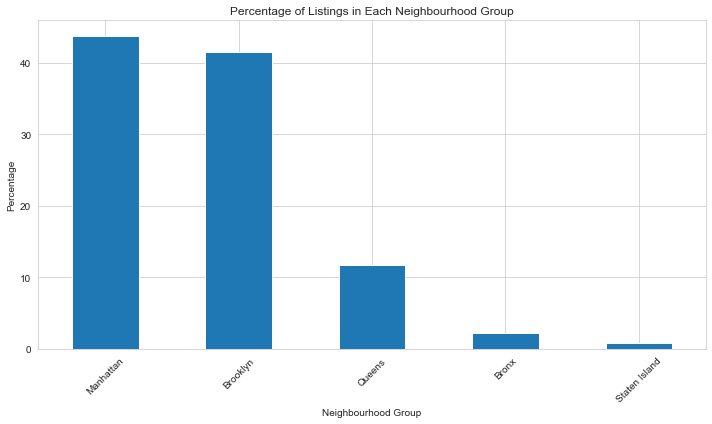

In [500]:
# Create a bar graph
plt.figure(figsize=(10, 6))
neighbourhood_group_percentage.plot(kind='bar')
plt.title("Percentage of Listings in Each Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the graph
plt.show()

In [501]:

# Group the data by neighbourhood and neighbourhood group, and count the occurrences
grouped_data = df.groupby(['neighbourhood_group','neighbourhood']).size()

# Display the double entry table
grouped_data


neighbourhood_group  neighbourhood
Bronx                Allerton         42
                     Baychester        7
                     Belmont          24
                     Bronxdale        19
                     Castle Hill       9
                                      ..
Staten Island        Tompkinsville    42
                     Tottenville       7
                     West Brighton    18
                     Westerleigh       2
                     Willowbrook       1
Length: 219, dtype: int64

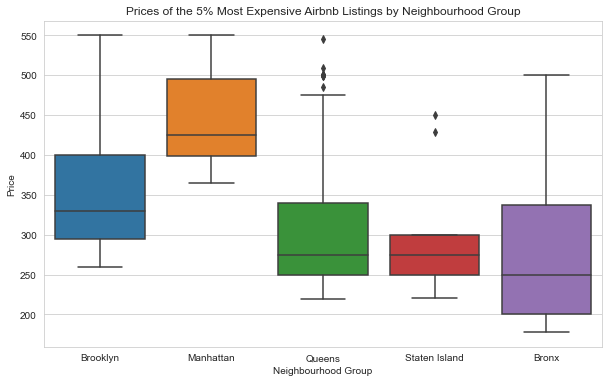

      neighbourhood_group   neighbourhood  price
15111               Bronx      Mott Haven    500
1527             Brooklyn      Park Slope    550
2181            Manhattan  Hell's Kitchen    550
22953              Queens  Rockaway Beach    545
48533       Staten Island       Stapleton    450


In [502]:
# Group the data by neighbourhood group and find the 95th percentile of prices within each group
grouped_data = df.groupby('neighbourhood_group')['price'].quantile(0.95)

# Filter the DataFrame to keep the listings with prices greater than or equal to the 95th percentile within each group
top_5_percent = df[df['price'].ge(df['neighbourhood_group'].map(grouped_data))]

# Set the plot style
sns.set_style('whitegrid')

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_5_percent, x='neighbourhood_group', y='price')
plt.title('Prices of the 5% Most Expensive Airbnb Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

# Display the chart
plt.show()

# Group the data by neighbourhood group and find the row with the minimum price within each group
expensive_neighborhoods = df.groupby('neighbourhood_group')['price'].idxmax()

# Get the corresponding rows for the cheapest neighborhoods
expensive_neighborhoods_data = df.loc[expensive_neighborhoods, ['neighbourhood_group', 'neighbourhood', 'price']]

# Display the cheapest neighborhoods
print(expensive_neighborhoods_data)

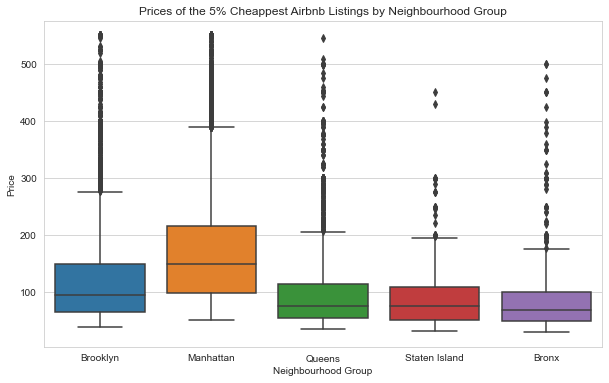

      neighbourhood_group  neighbourhood  price
34446               Bronx     Highbridge     10
22261            Brooklyn       Bushwick     10
2860            Manhattan   East Village     10
22835              Queens        Jamaica     10
45646       Staten Island  Randall Manor     13


In [503]:
# Group the data by neighbourhood group and find the 95th percentile of prices within each group
grouped_data = df.groupby('neighbourhood_group')['price'].quantile(0.05)

# Filter the DataFrame to keep the listings with prices greater than or equal to the 95th percentile within each group
top_5_percent = df[df['price'].ge(df['neighbourhood_group'].map(grouped_data))]

# Set the plot style
sns.set_style('whitegrid')

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_5_percent, x='neighbourhood_group', y='price')
plt.title('Prices of the 5% Cheappest Airbnb Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

# Display the chart
plt.show()


# Group the data by neighbourhood group and find the row with the minimum price within each group
cheapest_neighborhoods = df.groupby('neighbourhood_group')['price'].idxmin()

# Get the corresponding rows for the cheapest neighborhoods
cheapest_neighborhoods_data = df.loc[cheapest_neighborhoods, ['neighbourhood_group', 'neighbourhood', 'price']]

# Display the cheapest neighborhoods
print(cheapest_neighborhoods_data)

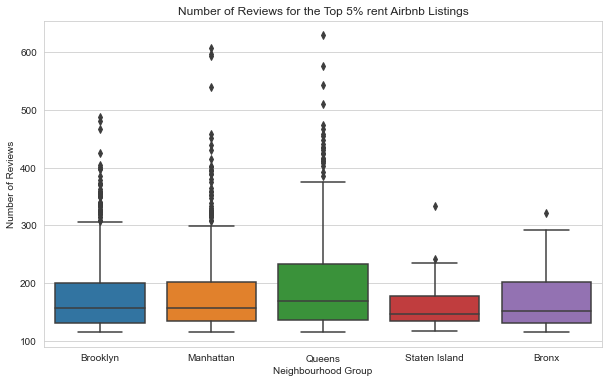

In [504]:
# Calculate the 95th percentile of the number of reviews
reviews_threshold = df['number_of_reviews'].quantile(0.95)

# Filter the DataFrame to keep the top 5% of listings based on the number of reviews
top_5_percent = df[df['number_of_reviews'] >= reviews_threshold]

# Set the plot style
sns.set_style('whitegrid')

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_5_percent, x='neighbourhood_group', y='number_of_reviews')
plt.title('Number of Reviews for the Top 5% rent Airbnb Listings')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')

# Display the chart
plt.show()

In [505]:
# Get the row with the maximum number of reviews for each neighbourhood group
most_reviews_listings = df.groupby('neighbourhood_group')['number_of_reviews'].idxmax()

# Get the corresponding rows for the listings with the most reviews
most_reviews_data = df.loc[most_reviews_listings, ['neighbourhood_group', 'neighbourhood', 'number_of_reviews']]

# Display the listings with the most reviews
print(most_reviews_data)

      neighbourhood_group  neighbourhood  number_of_reviews
5260                Bronx     Mott Haven                321
4870             Brooklyn     Park Slope                488
2031            Manhattan         Harlem                607
11759              Queens        Jamaica                629
256         Staten Island  Tompkinsville                333


In [506]:
app = Dash(__name__)

neighbourhood_group_percentage = (df['neighbourhood_group'].value_counts() / len(df)) * 100



# Create the bar graph using Plotly Express
fig = px.bar(neighbourhood_group_percentage, y='neighbourhood_group',
             title='Percentage of Listings in Each Neighbourhood Group',
             labels={'':'Percentage','neighbourhood_group': 'Neighbourhood Group'})

# Rotate the x-axis labels
fig.update_xaxes(tickangle=45)


# Group the data by neighbourhood group and find the 95th percentile of prices within each group
grouped_datas = df.groupby('neighbourhood_group')['price'].quantile(0.95)

# Filter the DataFrame to keep the listings with prices greater than or equal to the 95th percentile within each group
top_5_percent_expensive = df[df['price'].ge(df['neighbourhood_group'].map(grouped_datas))]

# Create the box plot using Plotly Express
five_percent_most_expensive = px.box(top_5_percent_expensive, x='neighbourhood_group', y='price',
             title='Prices of the 5% Most Expensive Airbnb Listings by Neighbourhood Group',
             labels={'neighbourhood_group': 'Neighbourhood Group', 'price': 'Price'})

#-----------------------------------------------------------------------------------------------------------------------


# Calculate the 5th percentile of prices within each neighbourhood group
grouped_data = df.groupby('neighbourhood_group')['price'].quantile(0.05)

# Filter the DataFrame to keep the listings with prices greater than or equal to the 5th percentile within each group
top_5_percent_cheappest = df[df['price'].ge(df['neighbourhood_group'].map(grouped_data))]

# Create the box plot using Plotly Express
five_percent_cheappest = px.box(top_5_percent_cheappest, x='neighbourhood_group', y='price',
             title='Prices of the 5% Cheapest Airbnb Listings by Neighbourhood Group',
             labels={'neighbourhood_group': 'Neighbourhood Group', 'price': 'Price'})

#-----------------------------------------------------------------------------------------------------------------------

# Number of Reviews for the Top 5% rent Airbnb Listings
# Calculate the 95th percentile of the number of reviews
reviews_threshold = df['number_of_reviews'].quantile(0.95)

# Filter the DataFrame to keep the top 5% of listings based on the number of reviews
top_5_percent = df[df['number_of_reviews'] >= reviews_threshold]

five_percent_most_reviews = px.box(top_5_percent, x='neighbourhood_group', y='number_of_reviews',
            title='Number of Reviews for the Top 5% Most Reviewed Airbnb Listings',
            labels={'neighbourhood_group': 'Neighbourhood Group', 'number_of_reviews': 'Number of Reviews'})



app.layout = html.Div([
    html.H1("Airbnb Explorer NYC"),
    dcc.Graph(figure=fig),
    dcc.Graph(figure=five_percent_most_expensive),
    dcc.Graph(figure=five_percent_cheappest),
    dcc.Graph(figure=five_percent_most_reviews),
])



    
   

if __name__ == "__main__":
    app.run(debug=True, port=4000, use_reloader=False)

Dash is running on http://127.0.0.1:4000/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
